In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import os
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
train_dir = '/content/drive/My Drive/Zindi/train/'
test_dir = '/content/drive/My Drive/Zindi/test/'

In [ ]:

categories = ['1','2','3','4','5','6','7']

In [ ]:
#from keras.applications import *
#conv_base=Xception(input_shape = (299,229,3),weights='imagenet',include_top=False,pooling='avg')

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import VGG16

#conv_base = VGG16(weights = 'imagenet',include_top = False,input_shape = (128,128,3))
##conv_base.summary()

In [ ]:
#  from keras.applications.vgg19 import VGG19
#conv_base= VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")
#conv_base.summary()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights = 'imagenet',include_top = False,input_shape = (256,256,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
#conv_base.trainable = False
#for layer in conv_base.layers[:19]:
#  layer.trainable = False
conv_base.trainable = False

In [ ]:

from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential
from keras import layers,models,optimizers 
# Although this part can be done also with the functional API, I found that for this simple models, this becomes more intuitive
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(7, activation="softmax")) # Finally our activation layer! we use 10 outputs as we have 3 covid case(covid normal varial pnemoniea ) (labels)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dropout (Dropout)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              33555456  
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7175      
Total params: 48,277,319
Trainable params: 33,562,631
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from keras import optimizers
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
learning_rate = 1e-3

checkpoint = ModelCheckpoint("Crop_VGG16_5.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size=64
# Training generator
train_datagen = ImageDataGenerator(
        
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        )

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(256,256),
                                                    batch_size=64,
                                                    class_mode='categorical')

# Test generator
validation_generator = ImageDataGenerator(rescale=1./255)
validation_generator = validation_generator.flow_from_directory(test_dir, 
                                                     target_size=(256,256),
                                                     batch_size=64,
                                                     class_mode='categorical')

#test_datagen = ImageDataGenerator(rescale=1./255)
#test_generator = test_datagen.flow_from_directory(test_dir, 
 #                                                 target_size=(height,width), 
 #                                                 batch_size=batch_size,
 #                                                 seed=seed,
  #                                                shuffle=False,
   #                                               class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples
validation_num

Found 8566 images belonging to 7 classes.
Found 2138 images belonging to 7 classes.


2138

In [ ]:
sample_training_images, _ = next(train_generator)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

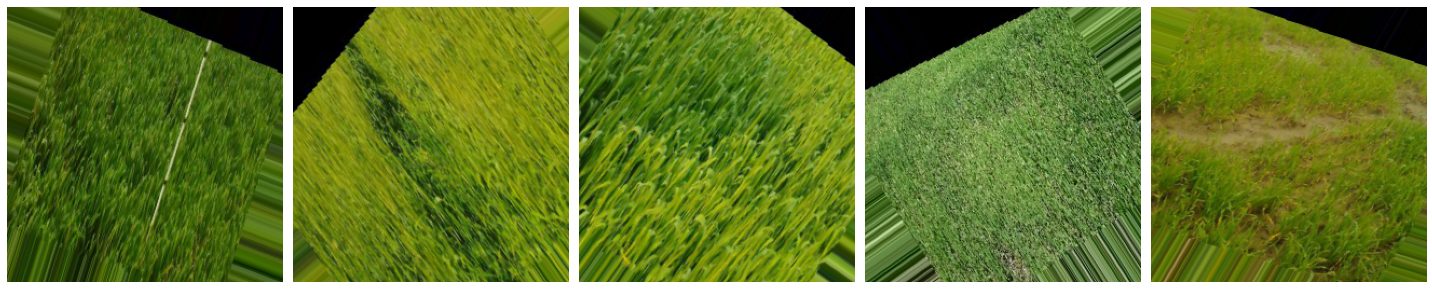

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
model_history = model.fit(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps= validation_num // batch_size,
                             callbacks=[checkpoint], 
                              verbose = 1)

Epoch 1/30
133/133 [==============================] - ETA: 0s - loss: 1.2573 - acc: 0.5091
Epoch 00001: val_acc did not improve from 0.51657
133/133 [==============================] - 149s 1s/step - loss: 1.2573 - acc: 0.5091 - val_loss: 1.2525 - val_acc: 0.5024
Epoch 2/30
133/133 [==============================] - ETA: 0s - loss: 1.2544 - acc: 0.5072
Epoch 00002: val_acc did not improve from 0.51657
133/133 [==============================] - 151s 1s/step - loss: 1.2544 - acc: 0.5072 - val_loss: 1.2441 - val_acc: 0.5114
Epoch 3/30
133/133 [==============================] - ETA: 0s - loss: 1.2514 - acc: 0.5076
Epoch 00003: val_acc improved from 0.51657 to 0.52083, saving model to Crop_VGG16_5.h5
133/133 [==============================] - 153s 1s/step - loss: 1.2514 - acc: 0.5076 - val_loss: 1.2386 - val_acc: 0.5208
Epoch 4/30
133/133 [==============================] - ETA: 0s - loss: 1.2446 - acc: 0.5163
Epoch 00004: val_acc did not improve from 0.52083
133/133 [========================

In [ ]:
  path='/content/drive/My Drive/Model_save/Crop_VGG16_5.h5'
model.save(path)

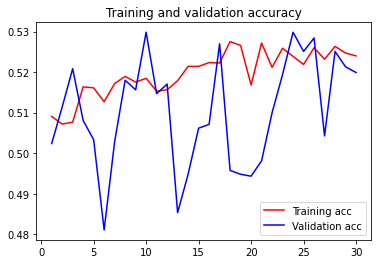

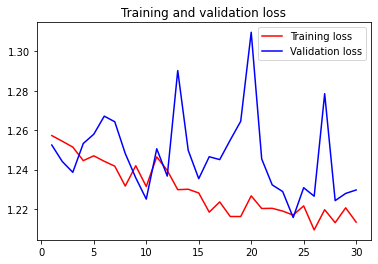

In [ ]:
#Plot Training and validation accuracy and Training and validation loss
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_pred
#validation_generator.classes

Instructions for updating:
Please use Model.predict, which supports generators.


array([0, 3, 0, ..., 0, 0, 6])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
accuracy = accuracy_score(validation_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 21.7% 


In [ ]:
print(metrics.classification_report(validation_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.37      0.33       610
           1       0.15      0.06      0.09       261
           2       0.12      0.09      0.10       145
           3       0.19      0.13      0.15       371
           4       0.06      0.07      0.06       187
           5       0.00      0.00      0.00        72
           6       0.23      0.30      0.26       492

    accuracy                           0.22      2138
   macro avg       0.15      0.15      0.14      2138
weighted avg       0.20      0.22      0.20      2138



In [ ]:
from keras.models import load_model
import cv2
from keras.preprocessing import image
import numpy as np
from keras import optimizers
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
test_data=[]
model_deploy = load_model('/content/drive/My Drive/Model_save/Crop_VGG19_1.h5')

test_gen = '/content/drive/My Drive/Zindi/test'
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'


LR = 1e-5
height=128
width=128
channels=3
seed=13
batch_size = 32 #Number of images to load at each iteration
num_classes = 3
epochs = 10
data_augmentation = True
num_predictions = 20

# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Test generator
#test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.33)
test_data_gen = train_datagen.flow_from_directory(test_gen, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=True,
                                                  class_mode='categorical',
                                                  )



Found 2138 images belonging to 7 classes.


In [ ]:
Y_pred = model_deploy.predict_generator(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_pred
#validation_generator.classes

array([6, 6, 6, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 24.5% 


In [ ]:
from keras.models import load_model
import cv2
from keras.preprocessing import image
import numpy as np
from keras import optimizers
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
test_data=[]
model_deploy = load_model('/content/drive/My Drive/Model_save/Crop_VGG16_5.h5')

categories = ['1','2','3','4','5','6','7']
test_gen = '/content/drive/My Drive/Zindi/checking'
for i in os.listdir(test_gen):
  test_data.append(i)
df=pd.DataFrame(test_data)



In [ ]:
df[0].count()

3559

In [ ]:
test_data_1=[]
pred_1=[]
test_data=[]
for imagePath in os.listdir(test_gen):
  fullpath = os.path.join(test_gen,imagePath) 
  test_data_1.append(fullpath)
  test_image_o = cv2.imread(fullpath) 
  test_image=cv2.resize(test_image_o,(256,256))# .flatten()
  test_data_2=np.array(test_image,dtype="float")/255.0
  test_data_2=test_data_2.reshape([-1,256,256, 3])
  #test_data_2.append(test_data_2)
  # scale the raw pixel intensities to the range [0, 1]
  #conf=max(model_deploy.predict(np.random.rand(1, 224,224, 3))[0])
  #conf="{:.2f}".format(conf*100)
  pred = model_deploy.predict(test_data_2)
  predictions =np.argmax(pred, axis=1) # return to label
  #pred_1.append(predictions[0])
  test_data.append(fullpath+'/'+str([predictions[0]]))

In [ ]:
df=pd.DataFrame({'Path':test_data})
df.head()

,Path
0,/content/drive/My Drive/Zindi/checking/01nUuQa...
1,/content/drive/My Drive/Zindi/checking/0Lgre5Q...
2,/content/drive/My Drive/Zindi/checking/0Kl8b4n...
3,/content/drive/My Drive/Zindi/checking/0KbZJFU...
4,/content/drive/My Drive/Zindi/checking/0JHmexw...


In [ ]:
df.to_csv("output.csv")

In [ ]:
from google.colab import files
files.download("output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
 join_1=[]
for k, category in enumerate(categories):
  for f in os.listdir(test_data_1):
    join_1.append([test_data_1+category+'/'+f, k])

TypeError: ignored

In [ ]:
print(join)

NameError: ignored